In [23]:
from sklearn.datasets import fetch_california_housing
pd.set_option('display.max_columns', None)
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

In [2]:
import pickle

with open('cancerdata.pkl', 'rb') as file:
    cancerdata= pickle.load(file)

In [6]:
cancerdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 751 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 751 non-null    int64  
 1   Number of sexual partners           751 non-null    float64
 2   First sexual intercourse            751 non-null    float64
 3   Num of pregnancies                  751 non-null    float64
 4   Smokes                              751 non-null    float64
 5   Smokes (years)                      751 non-null    float64
 6   Smokes (packs/year)                 751 non-null    float64
 7   Hormonal Contraceptives             751 non-null    float64
 8   Hormonal Contraceptives (years)     751 non-null    float64
 9   IUD                                 751 non-null    float64
 10  IUD (years)                         751 non-null    float64
 11  STDs                                751 non-null  

## Training and Scaling

In [7]:
features = cancerdata.drop(columns = ["Dx:Cancer"])
target = cancerdata["Dx:Cancer"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [9]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [10]:
X_train_scale = scaler.transform(X_train)

X_test_scale = scaler.transform(X_test)

In [11]:
X_train_scale = pd.DataFrame(X_train_scale, columns = X_train.columns)
X_train_scale.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0.342857,0.074074,0.363636,0.363636,0.0,0.0,0.0,1.0,0.454545,1.0,0.105263,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.071429,0.037037,0.227273,0.181818,0.0,0.0,0.0,1.0,0.045455,0.0,0.000000,1.0,0.75,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.171429,0.074074,0.318182,0.272727,0.0,0.0,0.0,1.0,0.011364,0.0,0.000000,1.0,0.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.442857,0.148148,0.227273,0.636364,0.0,0.0,0.0,1.0,0.030000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.042857,0.037037,0.227273,0.181818,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0,0.75,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
target

0      0
1      0
2      0
3      1
4      0
      ..
853    0
854    0
855    0
856    0
857    0
Name: Dx:Cancer, Length: 751, dtype: int64

## KNN Modeling

In [18]:
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train_scale, y_train)

knn.score(X_test_scale, y_test)

0.9668874172185431

In [25]:
pred = knn.predict(X_test)

In [26]:
print(f"Precision:",{precision_score(y_test, pred,zero_division=0)})
print(f"Accuracy:",{accuracy_score(y_test, pred)})
print(f"Recall:",{recall_score(y_test, pred)})
print(f"F1:",{f1_score(y_test, pred)})

Precision: {0.0}
Accuracy: {0.9602649006622517}
Recall: {0.0}
F1: {0.0}


## Feature Selection

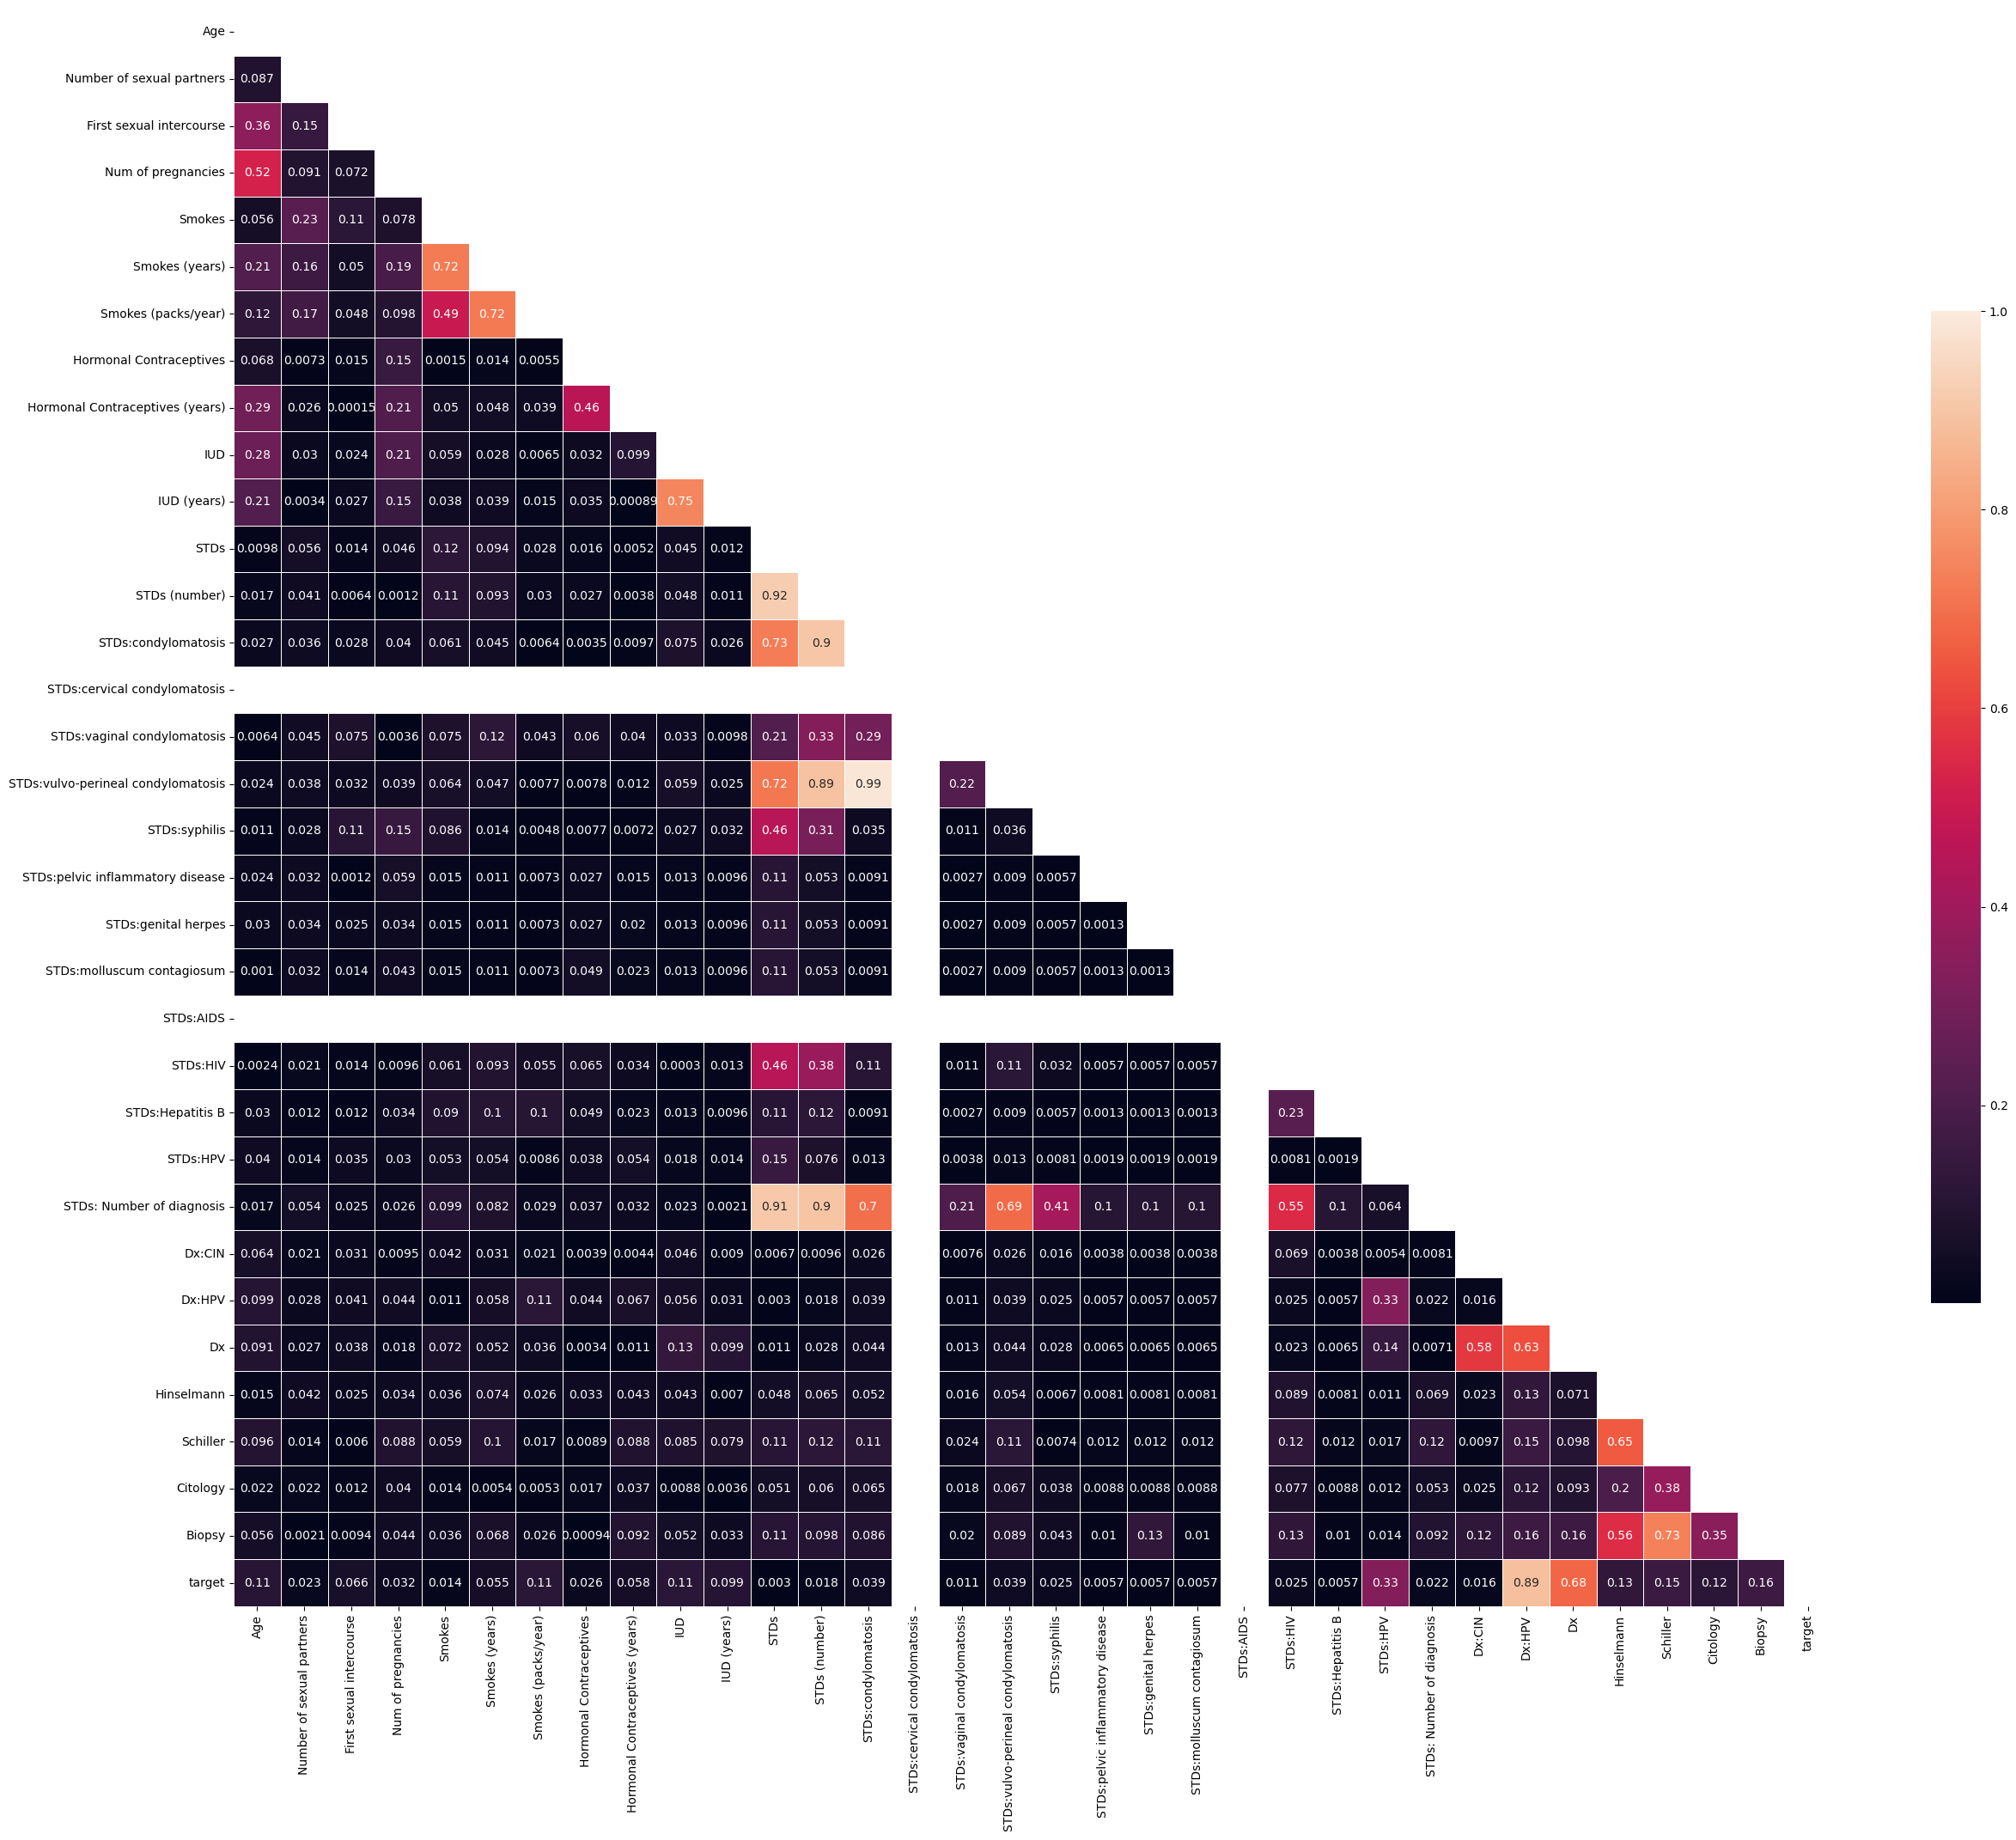

In [33]:
corr=np.abs(cancerdata.corr()) #absolute value of all correlations

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30,30))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()